In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from statsmodels.tsa.api import ExponentialSmoothing, ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima

In [496]:
df=pd.read_csv('./weather_revised.csv')

In [497]:
df

,date,maxtp,mintp,gmin,rain,cbl,wdsp,pe,evap
0,1-Jan-42,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4
1,2-Jan-42,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9
2,3-Jan-42,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6
3,4-Jan-42,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7
4,5-Jan-42,3.5,-0.8,0,0.6,1013.4,13.0,0.6,0.7
...,...,...,...,...,...,...,...,...,...
29884,27-Oct-23,13.2,4.1,-1,2.9,974.2,5.8,0.5,0.8
29885,28-Oct-23,14.1,9.3,7.2,4.4,970.1,8.5,0.7,1
29886,29-Oct-23,12.4,2.5,-1.2,11.1,972.0,5.2,0.4,0.6
29887,30-Oct-23,12.7,1.7,-1.3,2.1,979.9,4.1,0.3,0.5


In [498]:
df.isnull().sum()

date     0
maxtp    0
mintp    0
gmin     0
rain     0
cbl      0
wdsp     0
pe       0
evap     0
dtype: int64

In [499]:
df.drop_duplicates()

,date,maxtp,mintp,gmin,rain,cbl,wdsp,pe,evap
0,1-Jan-42,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4
1,2-Jan-42,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9
2,3-Jan-42,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6
3,4-Jan-42,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7
4,5-Jan-42,3.5,-0.8,0,0.6,1013.4,13.0,0.6,0.7
...,...,...,...,...,...,...,...,...,...
29884,27-Oct-23,13.2,4.1,-1,2.9,974.2,5.8,0.5,0.8
29885,28-Oct-23,14.1,9.3,7.2,4.4,970.1,8.5,0.7,1
29886,29-Oct-23,12.4,2.5,-1.2,11.1,972.0,5.2,0.4,0.6
29887,30-Oct-23,12.7,1.7,-1.3,2.1,979.9,4.1,0.3,0.5


In [500]:
# Check for missing values
missing_values = df['gmin'].isnull().sum()
print(f"Number of missing values in gmin: {missing_values}")


Number of missing values in gmin: 0


In [501]:
# Check data types
print(df['gmin'].dtype)


object


In [502]:
# Example of filling missing values with forward fill
df['gmin'] = df['gmin'].fillna(method='ffill')


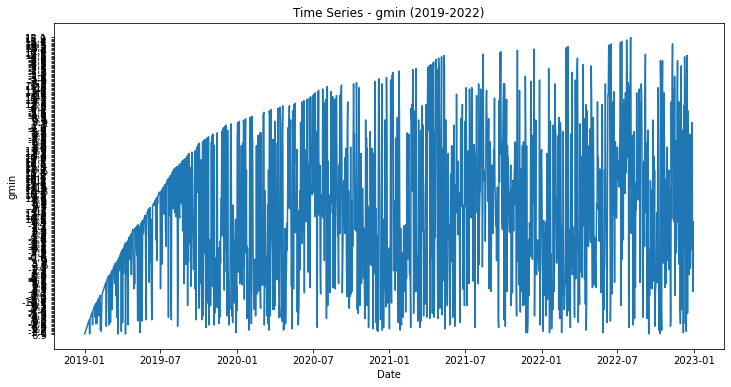

In [503]:

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Filter data from 2019 to 2022
filtered_df = df['2019-01-01':'2022-12-31']

variable = "gmin"
time_series = filtered_df[variable]

plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, time_series)
plt.title(f"Time Series - {variable} (2019-2022)")
plt.xlabel("Date")
plt.ylabel(variable)
plt.show()





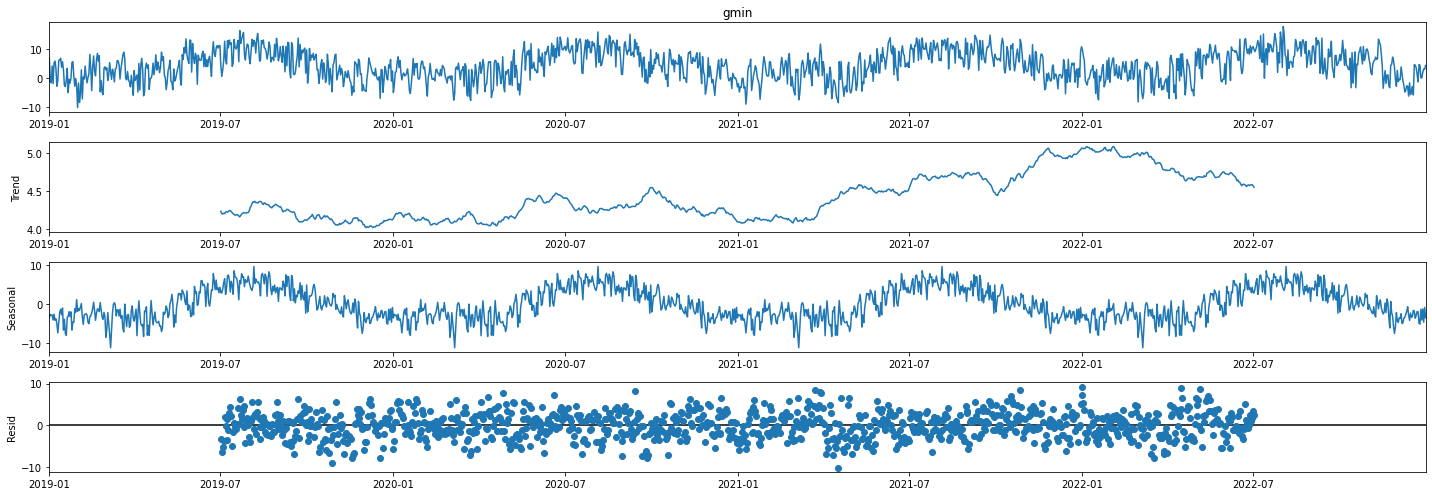

In [504]:
# Decompose the time series to visualize trend and seasonality


plt.rcParams['figure.figsize'] = [20,7]
result = seasonal_decompose(filtered_df['gmin'], model='additive', period=365)  # Assuming yearly seasonality
result.plot()
plt.show()


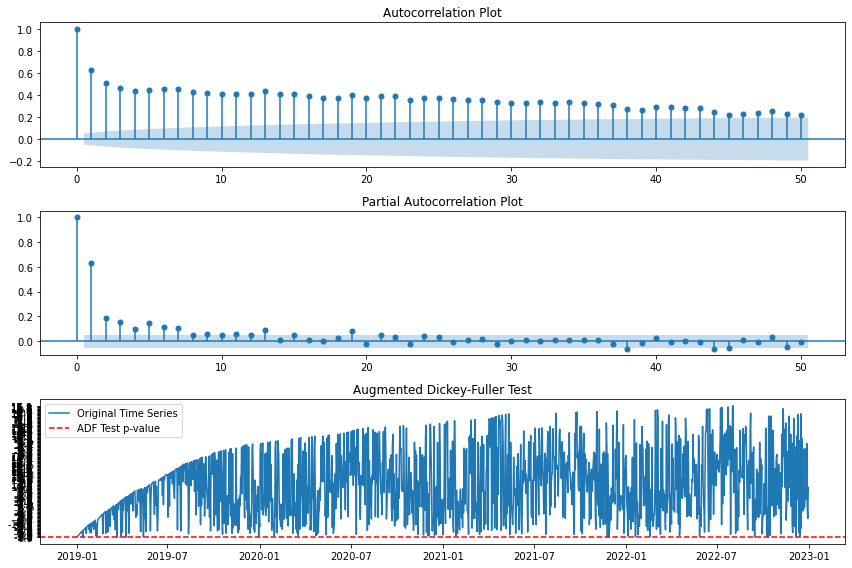

In [505]:


# Plot autocorrelation and partial autocorrelation
plt.figure(figsize=(12, 8))

# Autocorrelation plot
plt.subplot(3, 1, 1)
plot_acf(time_series, lags=50, ax=plt.gca())
plt.title("Autocorrelation Plot")

# Partial autocorrelation plot
plt.subplot(3, 1, 2)
plot_pacf(time_series, lags=50, ax=plt.gca())
plt.title("Partial Autocorrelation Plot")

# Check stationarity using Augmented Dickey-Fuller test
plt.subplot(3, 1, 3)
result = adfuller(time_series)
plt.plot(time_series, label='Original Time Series')
plt.axhline(y=result[1], color='r', linestyle='--', label='ADF Test p-value')
plt.title('Augmented Dickey-Fuller Test')
plt.legend()

plt.tight_layout()
plt.show()


In [506]:
result = adfuller(time_series)

# Extract and print test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Critical Values: {critical_values}')

# Interpret the results
if p_value <= 0.05:
    print("Reject the null hypothesis. The time series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The time series may not be stationary.")
    
print("************************************************************************************") 
    
result = kpss(time_series)

# Extract and print test statistics
kpss_statistic = result[0]
p_value = result[1]
critical_values = result[3]

print(f'KPSS Statistic: {kpss_statistic}')
print(f'p-value: {p_value}')
print(f'Critical Values: {critical_values}')

# Interpret the results
if p_value <= 0.05:
    print("Reject the null hypothesis. The time series is likely non-stationary.")
else:
    print("Fail to reject the null hypothesis. The time series is likely stationary.")


ADF Statistic: -3.0486298040503654
p-value: 0.03059585322844538
Critical Values: {'1%': -3.4349024693573584, '5%': -2.8635506057382325, '10%': -2.5678404322793846}
Reject the null hypothesis. The time series is likely stationary.
************************************************************************************
KPSS Statistic: 0.15531840505547606
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Fail to reject the null hypothesis. The time series is likely stationary.


/Users/gulbahar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  Information criteria to report. Either a single string or a list
/Users/gulbahar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  >>> arparams = np.r_[1, -arparams]


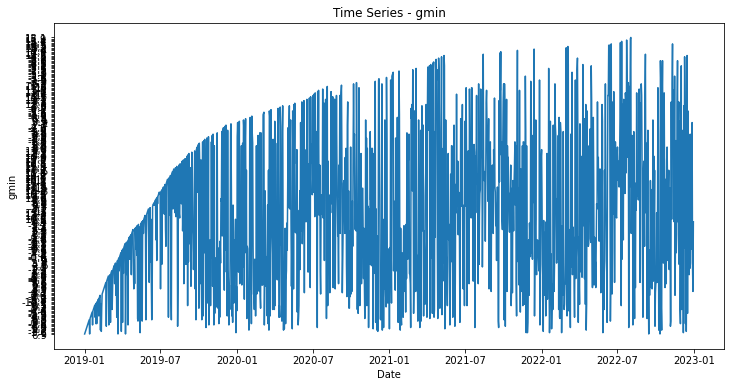

In [507]:
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title(f"Time Series - {variable}")
plt.xlabel("Date")
plt.ylabel(variable)
plt.show()

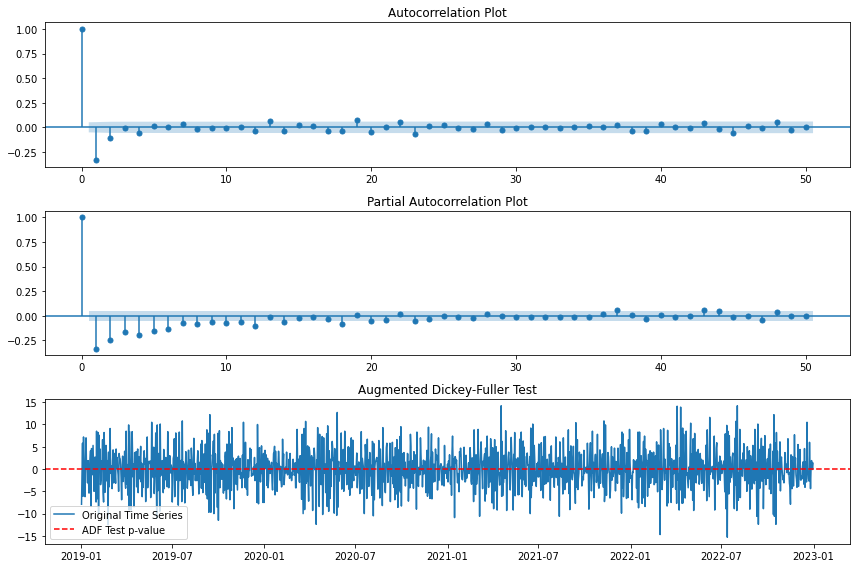

In [508]:
time_series_numeric = pd.to_numeric(time_series, errors='coerce')
first_difference = time_series_numeric.diff().dropna()

plt.figure(figsize=(12, 8))

# Autocorrelation plot
plt.subplot(3, 1, 1)
plot_acf(first_difference, lags=50, ax=plt.gca())
plt.title("Autocorrelation Plot")

# Partial autocorrelation plot
plt.subplot(3, 1, 2)
plot_pacf(first_difference, lags=50, ax=plt.gca())
plt.title("Partial Autocorrelation Plot")

# Check stationarity using Augmented Dickey-Fuller test
plt.subplot(3, 1, 3)
result = adfuller(time_series)
plt.plot(first_difference, label='Original Time Series')
plt.axhline(y=result[1], color='r', linestyle='--', label='ADF Test p-value')
plt.title('Augmented Dickey-Fuller Test')
plt.legend()

plt.tight_layout()
plt.show()

In [509]:
result = adfuller(first_difference)

# Extract and print test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Critical Values: {critical_values}')

# Interpret the results
if p_value <= 0.05:
    print("Reject the null hypothesis. The time series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The time series may not be stationary.")
    
print("************************************************************************************")    
result = kpss(first_difference)

# Extract and print test statistics
kpss_statistic = result[0]
p_value = result[1]
critical_values = result[3]

print(f'KPSS Statistic: {kpss_statistic}')
print(f'p-value: {p_value}')
print(f'Critical Values: {critical_values}')

# Interpret the results
if p_value <= 0.05:
    print("Reject the null hypothesis. The time series is likely non-stationary.")
else:
    print("Fail to reject the null hypothesis. The time series is likely stationary.")


ADF Statistic: -11.864506881435824
p-value: 6.724886657804592e-22
Critical Values: {'1%': -3.434911997169608, '5%': -2.863554810504947, '10%': -2.567842671398422}
Reject the null hypothesis. The time series is likely stationary.
************************************************************************************
KPSS Statistic: 0.014936121279516868
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Fail to reject the null hypothesis. The time series is likely stationary.


/Users/gulbahar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  Information criteria to report. Either a single string or a list
/Users/gulbahar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  >>> arparams = np.r_[1, -arparams]


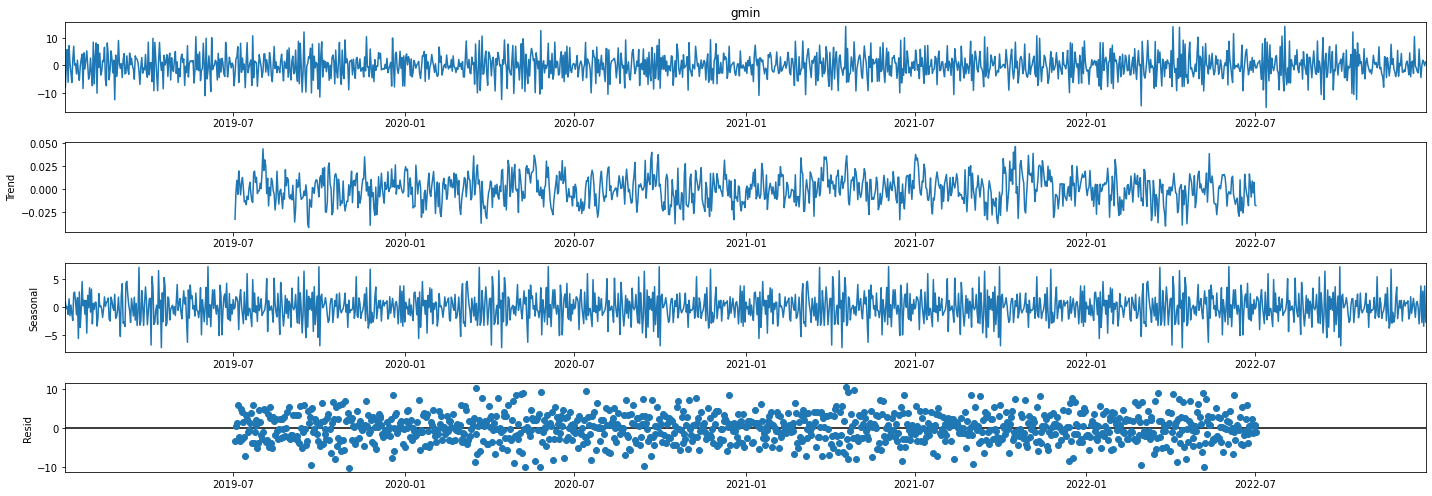

In [510]:
plt.rcParams['figure.figsize'] = [20,7]
result = seasonal_decompose(first_difference, model='additive', period=365)  # Assuming yearly seasonality
result.plot()
plt.show()

In [511]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

/Users/gulbahar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  raise ValueError("Frequency provided without associated index.")
/Users/gulbahar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  raise ValueError(msg.format("seasonal"))


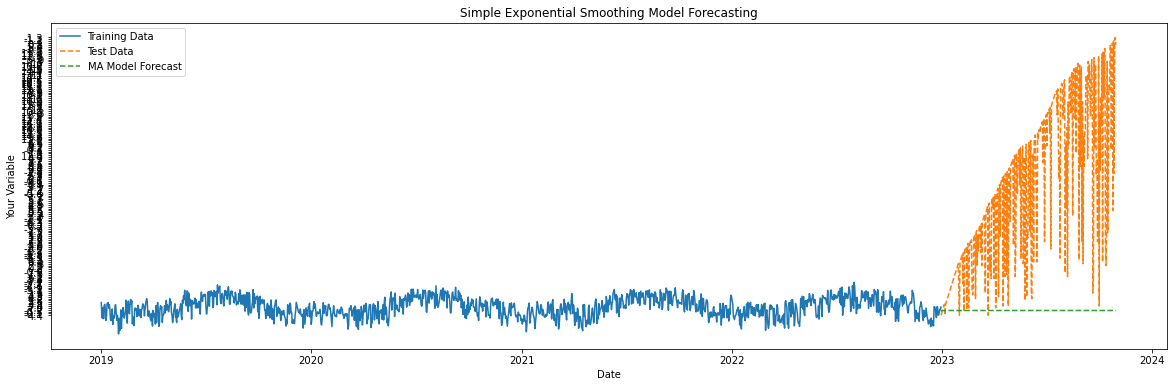

Mean Absolute Error (MAE): 4.9961763246222874
Mean Squared Error (MSE): 36.083152647306065
Root Mean Squared Error (RMSE): 6.006925390522681


In [534]:
time_series = pd.to_numeric(time_series, errors='coerce')
train_data = time_series['2019-01-01':'2022-12-31']
eval_data = df['2022-12-31':]
variable = "gmin"
test_data = eval_data[variable]

# Fit the model using training data
ma_model = sm.tsa.SimpleExpSmoothing(train_data).fit()

# Predictions for 2023
ma_predictions_2023 = ma_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data', linestyle='--')
plt.plot(ma_predictions_2023, label='MA Model Forecast', linestyle='--')
plt.title('Simple Exponential Smoothing Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Your Variable')
plt.legend()
plt.show()

# Calculate metrics
mae = mean_absolute_error(test_data, ma_predictions_2023)
mse = mean_squared_error(test_data, ma_predictions_2023)
rmse = np.sqrt(mse)

# Print or use the calculated metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

SES Metrics:
MAE: 4.9961763246222874
MSE: 36.083152647306065
RMSE: 6.006925390522681


/Users/gulbahar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  raise ValueError("Frequency provided without associated index.")
/Users/gulbahar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  raise ValueError(msg.format("seasonal"))


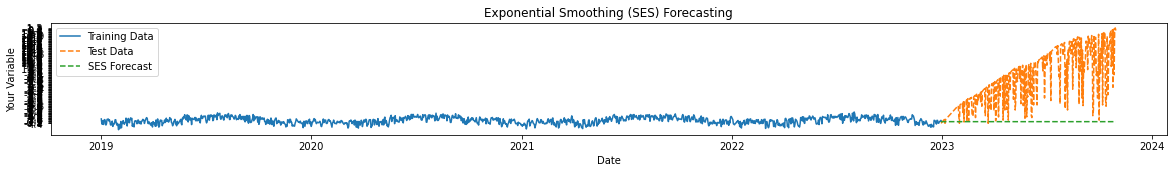

In [535]:
ses_model = sm.tsa.ExponentialSmoothing(train_data).fit()

# Predictions for 2023
ses_predictions_2023 = ses_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Calculate metrics for SES
mae_ses = mean_absolute_error(test_data, ses_predictions_2023)
mse_ses = mean_squared_error(test_data, ses_predictions_2023)
rmse_ses = np.sqrt(mse_ses)

print("SES Metrics:")
print("MAE:", mae_ses)
print("MSE:", mse_ses)
print("RMSE:", rmse_ses)

plt.subplot(3, 1, 1)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data', linestyle='--')
plt.plot(ses_predictions_2023, label='SES Forecast', linestyle='--')
plt.title('Exponential Smoothing (SES) Forecasting')
plt.xlabel('Date')
plt.ylabel('Your Variable')
plt.legend()
plt.show()


ARIMA Metrics:
MAE: 4.441518458031044
MSE: 28.092461390991826
RMSE: 5.300232201610777


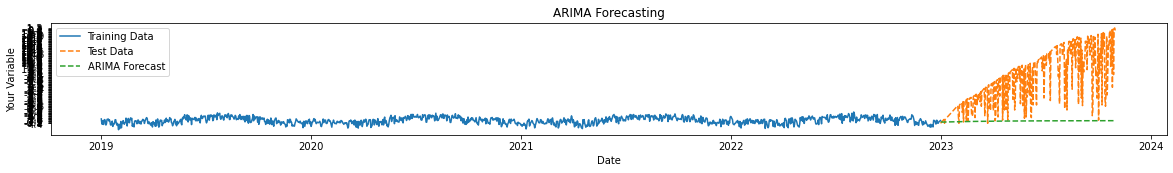

In [536]:
arima_model = auto_arima(train_data, seasonal=False, suppress_warnings=True)

# Predictions for 2023
arima_predictions_2023 = arima_model.predict(n_periods=len(test_data))

# Calculate metrics for ARIMA
mae_arima = mean_absolute_error(test_data, arima_predictions_2023)
mse_arima = mean_squared_error(test_data, arima_predictions_2023)
rmse_arima = np.sqrt(mse_arima)

print("\nARIMA Metrics:")
print("MAE:", mae_arima)
print("MSE:", mse_arima)
print("RMSE:", rmse_arima)

plt.subplot(3, 1, 2)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data', linestyle='--')
plt.plot(arima_predictions_2023, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Your Variable')
plt.legend()
plt.show()


SARIMA Metrics:
MAE: 4.441518458031044
MSE: 28.092461390991826
RMSE: 5.300232201610777


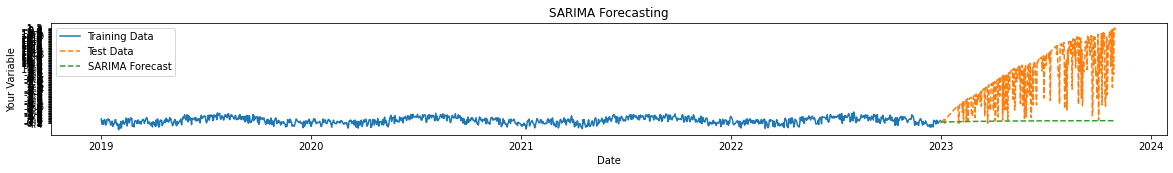

In [537]:
sarima_model = auto_arima(train_data, suppress_warnings=True)

# Predictions for 2023
sarima_predictions_2023 = sarima_model.predict(n_periods=len(test_data))

# Calculate metrics for SARIMA
mae_sarima = mean_absolute_error(test_data, sarima_predictions_2023)
mse_sarima = mean_squared_error(test_data, sarima_predictions_2023)
rmse_sarima = np.sqrt(mse_sarima)

print("\nSARIMA Metrics:")
print("MAE:", mae_sarima)
print("MSE:", mse_sarima)
print("RMSE:", rmse_sarima)

plt.subplot(3, 1, 3)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data', linestyle='--')
plt.plot(sarima_predictions_2023, label='SARIMA Forecast', linestyle='--')
plt.title('SARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Your Variable')
plt.legend()
plt.show()